# Постановка задачи

Проблема компании Booking — это нечестные отели, которые накручивают себе рейтинг.

Цель проекта - построение модели на основе машинного обучения, которая предсказывает рейтинг отеля.

Задачи проекта:

Ознакомится с входными данными (DataFrame с информацией об отелях);
Изучить пример машинного обучения (scikit - learn класс RandomForestRegressor)
Выполнить подготовку данных, которые будут использованы для обучения модели;
Проверить эффективность, предлагаемой модели, используя метрику MAPE;
Принять участие в соревнованиях на площадке kaggle.com
Соревнование kaggle с первоначальными данными находится по ссылке.

Файлы необходимые для обучения модели:

hotels_train.csv - набор данных для обучения
hotels_test.csv - набор данных для оценки качества
submission.csv - файл сабмишна в нужном формате
Признаки:

* hotel_address - адрес отеля
* review_date - дата, когда рецензент разместил соответствующий отзыв.
* average_score - средний балл отеля, рассчитанный на основе последнего комментария за последний год
* hotel_name - название отеля
* reviewer_nationality - национальность рецензента
* negative_review - отрицательный отзыв, который рецензент дал отелю.
* review_total_negative_word_counts - общее количество слов в отрицательном отзыв
* positive_review - положительный отзыв, который рецензент дал отелю
* review_total_positive_word_counts - общее количество слов в положительном отзыве
* reviewer_score - оценка, которую рецензент поставил отелю на основе своего опыта
* total_number_of_reviews_reviewer_has_given - количество отзывов, которые рецензенты дали в прошлом
* total_number_of_reviews - общее количество действительных отзывов об отеле
* tags - теги, которые рецензент дал отелю.
* days_since_review - продолжительность между датой проверки и датой очистки
* additional_number_of_scoring - есть также некоторые гости, которые просто поставили оценку сервису, а не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.* 
* lat - широта отеля
* lng - долгота отеля

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import re
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import category_encoders as ce # Для категоризации данных

from sklearn import preprocessing
# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

# Фиксируем RANDOM_SEED
RANDOM_SEED = 42

In [2]:
!pip freeze > requirements.txt

In [3]:
# !pip install geopy

# Загрузка и исследование данных

In [4]:
df_train = pd.read_csv(r'E:\Ан2\Аналитик (new)\Проджект питон\new_2025_03_02\EDA\eda-finall\hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(r'E:\Ан2\Аналитик (new)\Проджект питон\new_2025_03_02\EDA\eda-finall\hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(r'E:\Ан2\Аналитик (new)\Проджект питон\new_2025_03_02\EDA\eda-finall\submission.csv') # самбмишн
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [5]:
list(sample_submission)


['reviewer_score', 'id']

In [6]:
sample_submission.head()

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [9]:
df_train.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
count,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.00000,386803.000000,384355.000000,384355.000000
mean,498.246536,8.397231,18.538988,2743.992042,17.776985,7.17725,8.396906,49.443522,2.823402
std,500.258012,0.547881,29.703369,2316.457018,21.726141,11.05442,1.636090,3.466936,4.579043
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.00000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.00000,7.500000,48.214662,-0.143649
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.00000,8.800000,51.499981,-0.000250
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.00000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.00000,10.000000,52.400181,16.429233


In [10]:
df_train.describe(include="object")

,hotel_address,review_date,hotel_name,reviewer_nationality,negative_review,positive_review,tags,days_since_review
count,386803,386803,386803,386803,386803,386803,386803,386803
unique,1493,731,1492,225,248828,311737,47135,731
top,163 Marsh Wall Docklands Tower Hamlets London ...,8/2/2017,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,No Positive,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days
freq,3587,1911,3587,184033,95907,26885,3853,1911


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = pd.concat([df_train,df_test],axis=0).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [12]:
data.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,sample
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,1
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540,1
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060,1


Небольшие выводы: пропуски есть только в координатах. Чаще всего выбирают отель на 1 день, больше всего рецензентов из Великобритании, частый тег - туристическая поездка, адресов отелей - 1492.

# Очистка данных

In [13]:
data[data['sample'] == 1].duplicated().sum()

np.int64(307)

### Имеется 307 дубликатов, посмотрим на них

In [14]:
duplicated = data[data.duplicated()]
display(duplicated.head(2))
duplicated.shape

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,sample
21413,9 Rue Sainte Beuve 6th arr 75006 Paris France,22,9/27/2015,8.9,Hotel Le Sainte Beuve,Costa Rica,No Negative,0,143,Ir s a lovely boutique hotel full of Parisian...,53,4,10.0,"[' Leisure trip ', ' Family with older childre...",676 day,48.843900,2.329486,1
53110,7 rue Casimir Delavigne 6th arr 75006 Paris Fr...,44,9/25/2016,9.0,H tel Baume,Lebanon,nothing at all,4,253,bed was great staff are wonderful location ve...,10,1,10.0,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",312 day,48.850152,2.339278,1


(336, 18)

Не буду очищать дубликаты, не сходится сабмишн

In [15]:
# data.drop_duplicates(inplace=True)
# data.shape

### Заполним пустые координаты

In [16]:
# Короткий адрес
def address(x):
    x = x.split()[-1:-5:-1]
    x.reverse()
    x = ' '.join(x)
    return x

data['hotel_address2'] = data['hotel_address'].apply(address)


In [17]:
import time

adress_masc = (data['lng'].isnull())|(data['lat'].isnull())
list_hotels_nulls = set(data[adress_masc]['hotel_address2'])

# Вызываем метод geocode объекта геокодера для геокодирования адреса
geolocator = Nominatim(user_agent="SF_agent") # SF_agent sergeishepilin@gmail.com
    
# список адресов и широты с долготой
table = []
for address in list_hotels_nulls:

    location = geolocator.geocode(address)
    time.sleep(3)  # пауза между попытками
    # Печатаем результат
    table.append([address, location.latitude, location.longitude])

df_t = pd.DataFrame(table, columns = ['adr', 'lat2', 'lng2'])
shape1 = data.shape
data = data.merge(df_t,how='left', left_on='hotel_address2', right_on='adr')

adress_masc = (data['lng'].isnull())|(data['lat'].isnull())
print(data.shape, shape1)


(515738, 22) (515738, 19)


In [18]:
# Для Kaggle
table

[['Josefstadt 1080 Vienna Austria', 48.2105982, 16.35175],
 ['arr 75014 Paris France', 48.8870221, 2.3478318],
 ['Leopoldstadt 1020 Vienna Austria', 48.2006384, 16.4268953],
 ['bling 1190 Vienna Austria', 48.2037733, 16.3716945],
 ['Eixample 08009 Barcelona Spain', 41.3936885, 2.1636552],
 ['Alsergrund 1090 Vienna Austria', 48.225073, 16.3583976],
 ['arr 75008 Paris France', 48.8870221, 2.3478318],
 ['e 1030 Vienna Austria', 48.2083537, 16.3725042],
 ['Simmering 1110 Vienna Austria', 48.1631087, 16.4580128],
 ['Eixample 08010 Barcelona Spain', 41.3936885, 2.1636552],
 ['Eixample 08011 Barcelona Spain', 41.3936885, 2.1636552],
 ['Ottakring 1160 Vienna Austria', 48.2149546, 16.3021535],
 ['arr 75018 Paris France', 48.8870221, 2.3478318]]

In [19]:
data.loc[adress_masc,'lat'] = data[adress_masc]['lat2']
data.loc[adress_masc,'lng'] = data[adress_masc]['lng2']
data.drop(columns=['adr', 'lat2', 'lng2'], inplace=True, axis=1)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

Тестовый пример

In [21]:
# Текстовый адрес, который нужно геокодировать
address2 = "W11 4UL United Kingdom"
#"Josefst dter Stra e 10 12 08, Josefstadt 1080, Vienna Austria"
#"Holland Park Avenue Kensington and Chelsea London W11 4UL United Kingdom"
# Вызываем метод geocode объекта геокодера для геокодирования адреса
geolocator = Nominatim(user_agent="sergeishepilin@gmail.com")

location = geolocator.geocode(address2)
# Печатаем результат

print("Адрес:", address2)
print("Широта:", location.latitude)
print("Долгота:", location.longitude)


Адрес: W11 4UL United Kingdom
Широта: 51.5047633
Долгота: -0.2141409


Пропуски заполнены

# Переходим к разведывательному анализу данных

#### Генерация признаков

### Сделаю признак страны и города отеля

In [22]:
def address2(x):
    x = x.split()[-1:-6:-1]
    x.reverse()
    
    if x[len(x)-1] == 'Kingdom':
        
        city = x[len(x)-5] 
        country = ' '.join(x[3:5:])
    
    else:
        
        city = x[3]
        country = x[4]
          
    return country,city 


#data['hotel_address'] = data['hotel_address'].apply(lambda x: address2(x)[1] if len(x)>0 else 0)
data['Country_hotel'] = data['hotel_address'].apply(lambda x: address2(x)[0])
data['City_hotel'] = data['hotel_address'].apply(lambda x: address2(x)[1])

In [23]:
data.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,sample,hotel_address2,Country_hotel,City_hotel
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,1,W1J 8LT United Kingdom,United Kingdom,London
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,1,WC1B 5AF United Kingdom,United Kingdom,London
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,1,arr 75006 Paris France,France,Paris
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540,1,arr 75019 Paris France,France,Paris
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060,1,1014 AG Amsterdam Netherlands,Netherlands,Amsterdam


In [24]:
data['City_hotel'].value_counts()

City_hotel
London       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: count, dtype: int64

### Преобразуем дату создания отзыва

In [25]:
data['review_year'] = pd.to_datetime(data['review_date']).dt.year
data['review_month'] = pd.to_datetime(data['review_date']).dt.month
data['review_weekday'] = pd.to_datetime(data['review_date']).dt.weekday + 1

def season(x):
    
    if x in [12,1,2]:
        return 'winter'
    
    elif x in [3,4,5]:
        return 'spring'
    
    elif x in [6,7,8]:
        return 'summer'
    
    elif x in [9,10,11]:
        return 'autumn'
    
data['season'] = data['review_month'].apply(season)   
    
data.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,lat,lng,sample,hotel_address2,Country_hotel,City_hotel,review_year,review_month,review_weekday,season
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,51.507894,-0.143671,1,W1J 8LT United Kingdom,United Kingdom,London,2016,2,5,winter
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,51.521009,-0.123097,1,WC1B 5AF United Kingdom,United Kingdom,London,2017,1,4,winter
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,48.845377,2.325643,1,arr 75006 Paris France,France,Paris,2016,10,2,autumn
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,48.888697,2.394540,1,arr 75019 Paris France,France,Paris,2015,9,2,autumn
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,52.385601,4.847060,1,1014 AG Amsterdam Netherlands,Netherlands,Amsterdam,2016,3,6,spring


### Подумаю над tags - теги, которые рецензент дал отелю.

In [26]:
#data['tags_mobile']

def tags(x):
    
    mobile, leisure_trip, business_trip, g_trip, couple_trip, solo_trip, children_trip = [0,0,0,0,0,0,0]
    x = x[3:-3].split(" ', ' ")
    
    for tag in x:
        tag = tag.strip() # Удалим пробелы в начале и конце тега 
        
        # Отзыва с мобильного девайса?
        if tag == 'Submitted from a mobile device':
            mobile = 1
        
        # Туристическая поездка?    
        elif tag == 'Leisure trip':    
            leisure_trip = 1
                  
        # Бизнес-поездка?    
        elif tag == 'Business trip':     
            business_trip = 1
                
         # Группа
        elif tag == 'Group':     
            g_trip= 1
    
         # Пара
        elif tag == 'Couple':     
            couple_trip= 1
     
         # Соло   
        elif tag == 'Solo traveler':     
            solo_trip = 1
      
        
         # С детьми   
        elif tag == 'Family with young children':     
            children_trip = 1
       
      
                     
    return mobile, leisure_trip, business_trip, g_trip, couple_trip, solo_trip, children_trip

all_tags = ['mobile', 'leisure_trip', 'business_trip', 'g_trip', 'couple_trip', 'solo_trip', 'children_trip']


### Добавляю новые столбцы

In [27]:
for i, column in enumerate(all_tags):
    data[column] = data['tags'].apply(lambda x: tags(x)[i])

In [28]:
data.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,review_month,review_weekday,season,mobile,leisure_trip,business_trip,g_trip,couple_trip,solo_trip,children_trip
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,2,5,winter,1,1,0,0,1,0,0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,1,4,winter,0,0,1,0,1,0,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,10,2,autumn,1,1,0,0,0,1,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,9,2,autumn,0,1,0,0,0,1,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,3,6,spring,0,0,1,0,1,0,0


In [29]:
# Количество ночей
regex = "Stayed \d{1,4} night" 
data['night_counts'] = data['tags'].str.findall(regex)

def nigths(col):
    if col:
        return col[0].split()[1]
    
data['night_counts'] = data['night_counts'].apply(nigths)

In [30]:
data.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,review_weekday,season,mobile,leisure_trip,business_trip,g_trip,couple_trip,solo_trip,children_trip,night_counts
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,5,winter,1,1,0,0,1,0,0,2
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,4,winter,0,0,1,0,1,0,0,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,2,autumn,1,1,0,0,0,1,0,3
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,2,autumn,0,1,0,0,0,1,0,1
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,6,spring,0,0,1,0,1,0,0,6


### Немного визуализации

In [31]:
season1 = data.groupby(['season'])['additional_number_of_scoring'].count().to_frame().reset_index()
season2 = data.groupby(['season', 'hotel_name'])['additional_number_of_scoring'].count().to_frame().reset_index()
season3 = data.groupby(['hotel_name'])['additional_number_of_scoring'].count().to_frame().reset_index()
season3.columns = ['hotel', 'count']
season2.columns = ['season', 'hotel', 'count']
season1.columns = ['season', 'count']
season1

,season,count
0,autumn,122241
1,spring,130483
2,summer,142886
3,winter,120128


In [32]:
season2
season2.nlargest(columns='count',n = 10)

,season,hotel,count
1634,spring,Britannia International Hotel Canary Wharf,1294
5699,winter,Strand Palace Hotel,1284
183,autumn,Britannia International Hotel Canary Wharf,1213
3124,summer,Britannia International Hotel Canary Wharf,1201
2737,spring,Strand Palace Hotel,1174
2593,spring,Park Plaza Westminster Bridge London,1117
4613,winter,Britannia International Hotel Canary Wharf,1081
4085,summer,Park Plaza Westminster Bridge London,1059
4229,summer,Strand Palace Hotel,1014
1114,autumn,Park Plaza Westminster Bridge London,1009


In [33]:
season3.nlargest(columns='count',n = 10)

,hotel,count
185,Britannia International Hotel Canary Wharf,4789
1290,Strand Palace Hotel,4256
1146,Park Plaza Westminster Bridge London,4169
241,Copthorne Tara Hotel London Kensington,3578
282,DoubleTree by Hilton Hotel London Tower of London,3212
369,Grand Royale London Hyde Park,2958
531,Holiday Inn London Kensington,2768
516,Hilton London Metropole,2628
1018,Millennium Gloucester Hotel London,2565
836,Intercontinental London The O2,2551


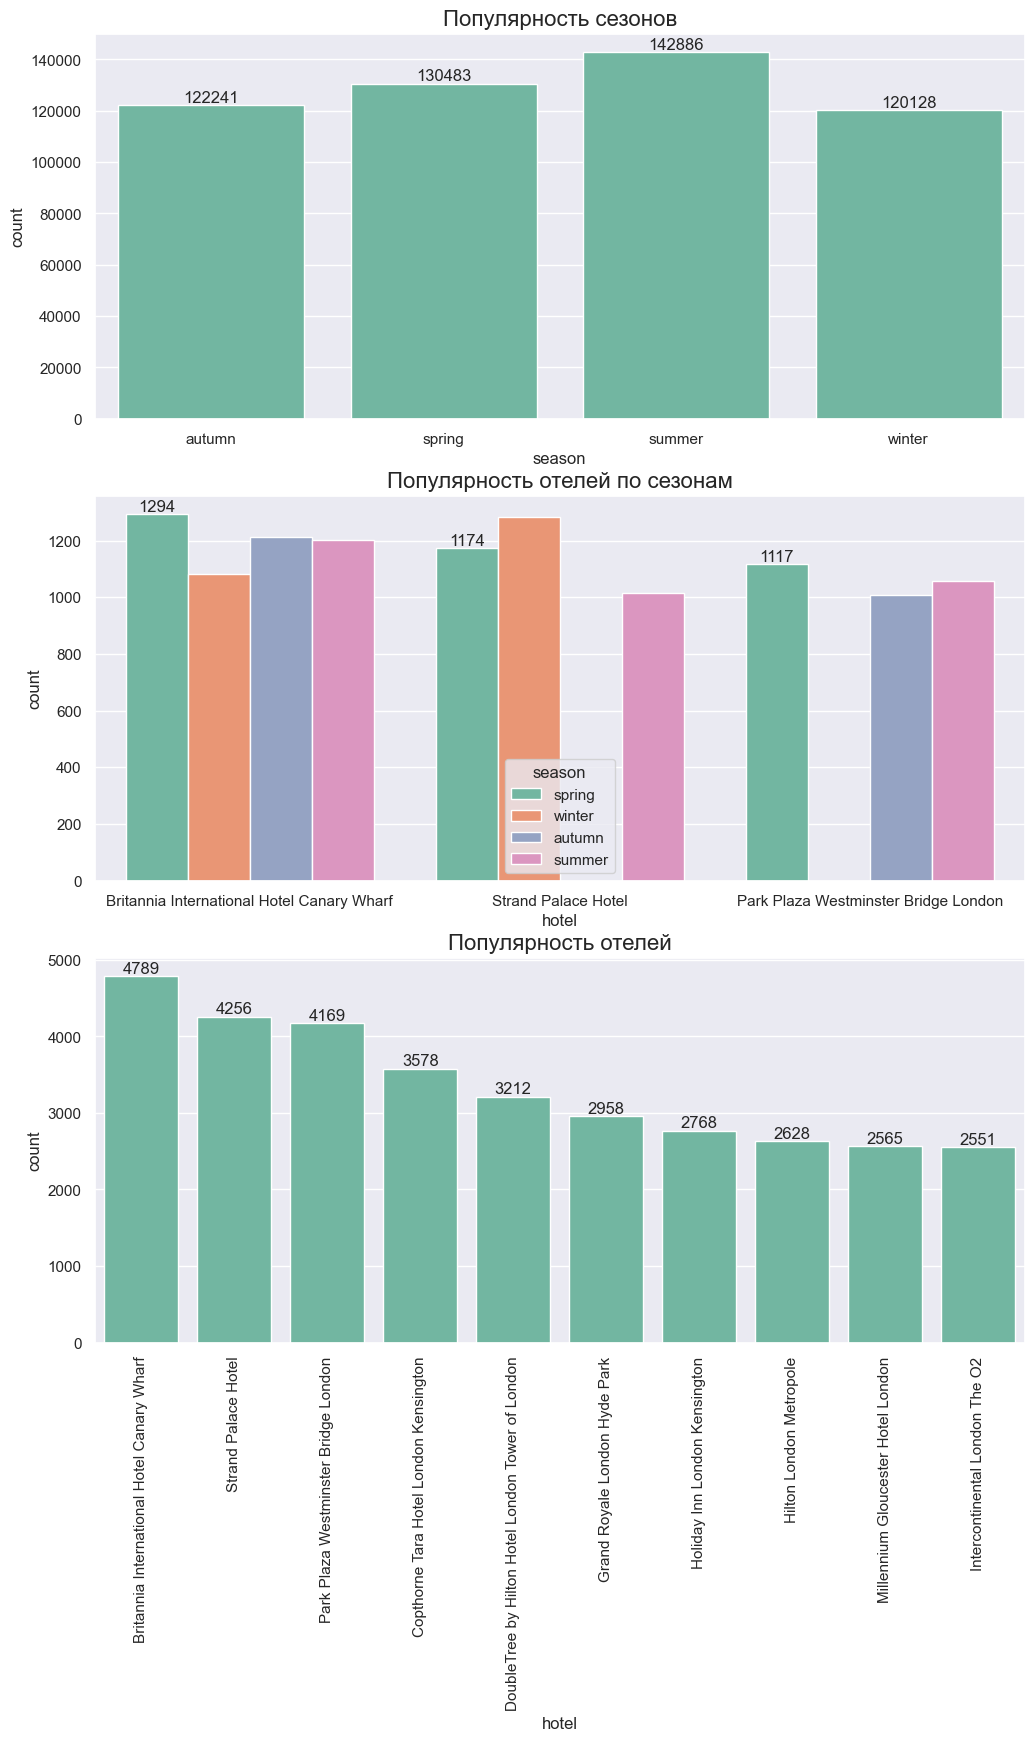

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 17))

sns.barplot(
    data=season1,
    y='count',
    x='season',
    ax=axes[0]
)
axes[0].bar_label(axes[0].containers[0], fontsize=12);
axes[0].set_title('Популярность сезонов', fontsize=16);

sns.barplot(
    data=season2.nlargest(columns='count',n = 10),
    y='count',
    x='hotel',
    hue='season',
    ax=axes[1]
)
axes[1].bar_label(axes[1].containers[0], fontsize=12);
#axes[1].xaxis.set_tick_params(rotation=)
axes[1].set_title('Популярность отелей по сезонам', fontsize=16);

sns.barplot(
    data=season3.nlargest(columns='count',n = 10),
    y='count',
    x='hotel',
    ax=axes[2]
)
axes[2].bar_label(axes[2].containers[0], fontsize=12);
axes[2].xaxis.set_tick_params(rotation=90)
axes[2].set_title('Популярность отелей', fontsize=16);

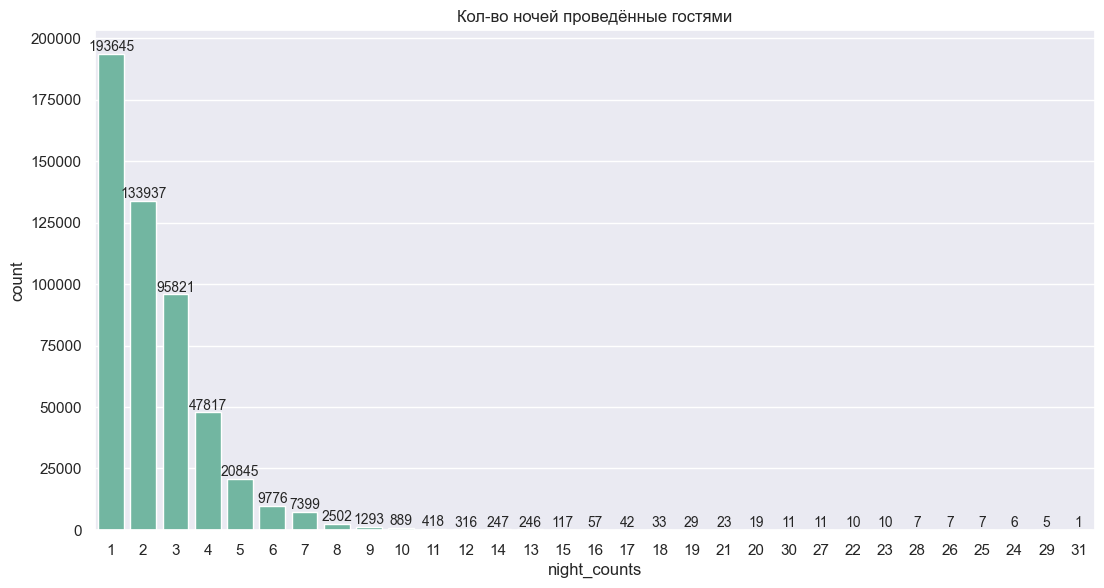

In [35]:
render = data['night_counts'].value_counts(dropna=False).to_frame()

fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])

barplot = sns.barplot(
    data=render,
    y='count',
    x=render.index
)
barplot.bar_label(barplot.containers[0], fontsize=10);
barplot.set_title('Кол-во ночей проведённые гостями');


Чаще всего остаюся на одну-две ночи. Есть пропуски

In [36]:
# Удаляю не нужные столбцы
data.drop(inplace=True,columns=['hotel_address', 'tags', 'hotel_name', 'hotel_address2']) # 'hotel_address2'
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   review_date                                 515738 non-null  object 
 2   average_score                               515738 non-null  float64
 3   reviewer_nationality                        515738 non-null  object 
 4   negative_review                             515738 non-null  object 
 5   review_total_negative_word_counts           515738 non-null  int64  
 6   total_number_of_reviews                     515738 non-null  int64  
 7   positive_review                             515738 non-null  object 
 8   review_total_positive_word_counts           515738 non-null  int64  
 9   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 

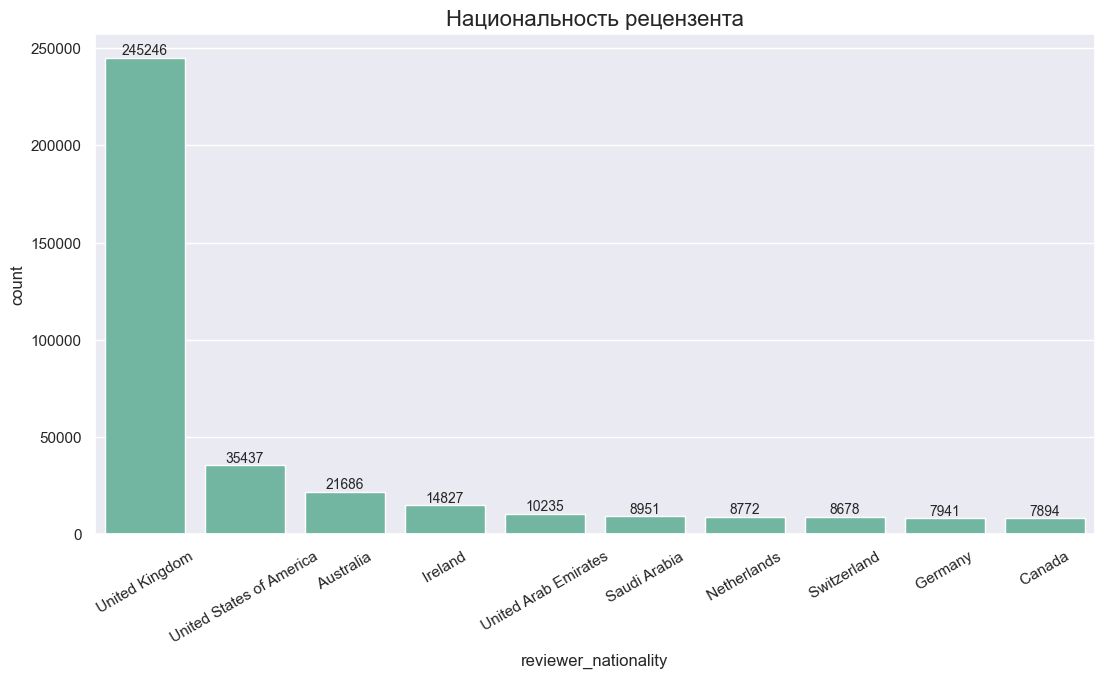

In [37]:
render = data['reviewer_nationality'].value_counts().to_frame().nlargest(10, columns='count')

fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])

barplot = sns.barplot(
    data=render,
    y='count',
    x=render.index
)
barplot.bar_label(barplot.containers[0], fontsize=10);
axes.xaxis.set_tick_params(rotation=30)
barplot.set_title('Национальность рецензента', fontsize=16);

### Выводы:
* Большинство клиентов из Великобритании.
* Самый популярный сезон лето, а менее популярный - зима
* Britannia International Hotel Canary Wharf - самый популярный отель

### Признак - количество ночей

In [38]:
data['night_counts']
# Где нет данных заменим на нули
data.loc[data['night_counts'].isnull(),'night_counts'] = 0
data['night_counts'] = data['night_counts'].astype('int')
#data.sort_values(by='night_counts', inplace = True) # нельзя сортировать, ошибка сабмишна

# функция для деления ночей по категориям
def cat_night(night_counts):
    if night_counts > 0 and night_counts <= 2:
        return 1
    
    elif night_counts > 2 and night_counts <= 10:
        return 2
        
    elif night_counts > 10 and night_counts <= 14:
        return 3
    else:
        return 4

data['night_counts'] = data['night_counts'].apply(cat_night)    
data['night_counts'].value_counts()

night_counts
1    327582
2    186342
3      1227
4       587
Name: count, dtype: int64

### Закодируем признаки

In [39]:
# Признаки: название города, сезонность, ночи. Используем кодировщик OneHotEncoder

encoder = ce.OneHotEncoder(cols=['City_hotel', 'Country_hotel', 'season','night_counts'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data[['City_hotel', 'Country_hotel', 'season','night_counts']])
data = pd.concat([data, type_bin], axis=1)

### Работаю над национальностью

In [40]:
# При пустых ячейках буду заполнять национальность из страны отеля
data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: x.strip())
data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: 'rev_' + x.replace(' ','_'))
data.loc[data['reviewer_nationality'] == 'rev_', 'reviewer_nationality'] = 'rev_' + data['Country_hotel']

data.head()

# Признаки: национальность ревьюера. Используем кодировщик BinaryEncoder
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['reviewer_nationality'])
data = pd.concat([data, type_bin], axis=1)

In [41]:
# Удаляю не нужные признаки
data.drop(inplace=True,columns=['reviewer_nationality','Country_hotel','City_hotel', 'season','review_date','night_counts'])

data.head()

,additional_number_of_scoring,average_score,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,...,night_counts_3.0,night_counts_4.0,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7
0,581,8.4,Leaving,3,1994,Staff were amazing,4,7,10.0,531 day,...,0,0,0,0,0,0,0,0,0,1
1,299,8.3,poor breakfast,3,1361,location,2,14,6.3,203 day,...,0,0,0,0,0,0,0,0,0,1
2,32,8.9,No kettle in room,6,406,No Positive,0,14,7.5,289 day,...,0,0,0,0,0,0,0,0,1,0
3,34,7.5,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,681 day,...,0,0,0,0,0,0,0,0,0,1
4,914,8.5,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,516 day,...,0,0,0,0,0,0,0,0,1,1


### Поработаю над отзывами

In [42]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time

# Пример оценки отзыва
nltk.downloader.download('vader_lexicon')

sent_analyzer = SentimentIntensityAnalyzer()

rev1 = " The taxi company who you called said they would collect us from the O2 and when we called them they said they were too busy so two ladies on their own had to find out how to get back to the Hotel "
rev2 = " The comfortable feeling of the facilities"
rev3="Я ненавижу этот отель"

print(f"review 1:\n{rev1}\nScore: {sent_analyzer.polarity_scores(rev1)}")
print(f"\nreview 2:\n{rev2}\nScore: {sent_analyzer.polarity_scores(rev2)}")
print(f"\nreview 3:\n{rev3}\nScore: {sent_analyzer.polarity_scores(rev3)}")

review 1:
 The taxi company who you called said they would collect us from the O2 and when we called them they said they were too busy so two ladies on their own had to find out how to get back to the Hotel 
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

review 2:
 The comfortable feeling of the facilities
Score: {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.5859}

review 3:
Я ненавижу этот отель
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ALFA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
def review(x):
    
    "Функция определяет положительный ли отзыв на самом деле или отрицательный"
    """Если compound score больше 0, текст считается позитивным.
        Если compound score меньше -0.05, текст считается негативным.
        Если compound score между -0.05 и 0.05, текст считается нейтральным."""
        
    x = sent_analyzer.polarity_scores(x)
    return x['compound']
   

print(review(rev1))

0.0


In [44]:
data['positive_review'] = data['positive_review'].apply(review)
data['negative_review'] = data['negative_review'].apply(review)
data[['negative_review','positive_review']]

# а теперь сложим эти результаты
data['review'] = data['negative_review'] + data['positive_review']

# Удаляю не нужные признаки
data.drop(inplace=True,columns=['negative_review','positive_review'])

data['review'].head()

0    0.5859
1   -0.4767
2    0.0440
3    0.2073
4    0.6003
Name: review, dtype: float64

# Анализ мультиколлинеарности. Отбор признаков.

In [45]:
# удалю не чиловые типы данных

data.iloc[:,0:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   reviewer_score                              515738 non-null  float64
 7   days_since_review                           515738 non-null  object 
 8   lat                                         515738 non-null  float64
 9   lng                                         515738 non-null  float64
 

In [46]:
data.iloc[:,20:35].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   children_trip                 515738 non-null  int64
 1   City_hotel_London             515738 non-null  int64
 2   City_hotel_Paris              515738 non-null  int64
 3   City_hotel_Amsterdam          515738 non-null  int64
 4   City_hotel_Milan              515738 non-null  int64
 5   City_hotel_Vienna             515738 non-null  int64
 6   City_hotel_Barcelona          515738 non-null  int64
 7   Country_hotel_United Kingdom  515738 non-null  int64
 8   Country_hotel_France          515738 non-null  int64
 9   Country_hotel_Netherlands     515738 non-null  int64
 10  Country_hotel_Italy           515738 non-null  int64
 11  Country_hotel_Austria         515738 non-null  int64
 12  Country_hotel_Spain           515738 non-null  int64
 13  season_winter 

In [47]:
data.iloc[:,35:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   season_spring           515738 non-null  int64  
 1   season_summer           515738 non-null  int64  
 2   night_counts_1.0        515738 non-null  int64  
 3   night_counts_2.0        515738 non-null  int64  
 4   night_counts_3.0        515738 non-null  int64  
 5   night_counts_4.0        515738 non-null  int64  
 6   reviewer_nationality_0  515738 non-null  int64  
 7   reviewer_nationality_1  515738 non-null  int64  
 8   reviewer_nationality_2  515738 non-null  int64  
 9   reviewer_nationality_3  515738 non-null  int64  
 10  reviewer_nationality_4  515738 non-null  int64  
 11  reviewer_nationality_5  515738 non-null  int64  
 12  reviewer_nationality_6  515738 non-null  int64  
 13  reviewer_nationality_7  515738 non-null  int64  
 14  review              

In [48]:
data.drop(inplace=True, columns=['days_since_review'])

In [49]:
# Числовые признаки
number = ['lng','lat','review','average_score','additional_number_of_scoring','review_total_negative_word_counts',
          'review_total_positive_word_counts','reviewer_score','total_number_of_reviews_reviewer_has_given','total_number_of_reviews']

print(len(number) == len(set(number)))

# Категориальные признаки
cat = []
for element in data.columns:
    if element not in number:
        cat.append(element)
print(cat)

True
['sample', 'review_year', 'review_month', 'review_weekday', 'mobile', 'leisure_trip', 'business_trip', 'g_trip', 'couple_trip', 'solo_trip', 'children_trip', 'City_hotel_London', 'City_hotel_Paris', 'City_hotel_Amsterdam', 'City_hotel_Milan', 'City_hotel_Vienna', 'City_hotel_Barcelona', 'Country_hotel_United Kingdom', 'Country_hotel_France', 'Country_hotel_Netherlands', 'Country_hotel_Italy', 'Country_hotel_Austria', 'Country_hotel_Spain', 'season_winter', 'season_autumn', 'season_spring', 'season_summer', 'night_counts_1.0', 'night_counts_2.0', 'night_counts_3.0', 'night_counts_4.0', 'reviewer_nationality_0', 'reviewer_nationality_1', 'reviewer_nationality_2', 'reviewer_nationality_3', 'reviewer_nationality_4', 'reviewer_nationality_5', 'reviewer_nationality_6', 'reviewer_nationality_7']


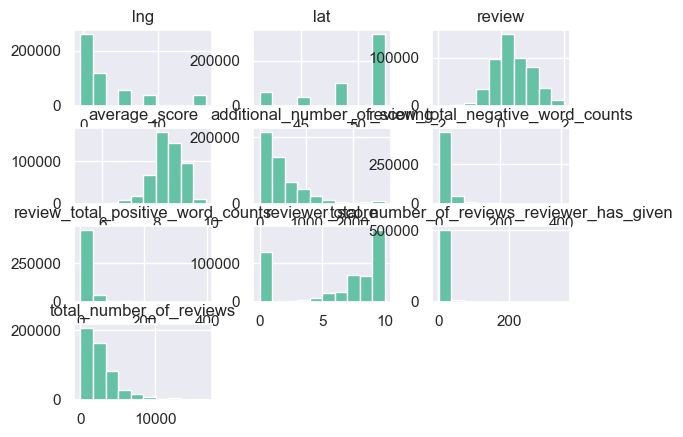

In [50]:
# Анализ мультиколлинеарности числовых признаков. Использование метода Пирсона.
data[number].hist();

##### Распределение числовых признаков имеет не нормальное распределение, но по условию надо использовать корреляцию Пирсона

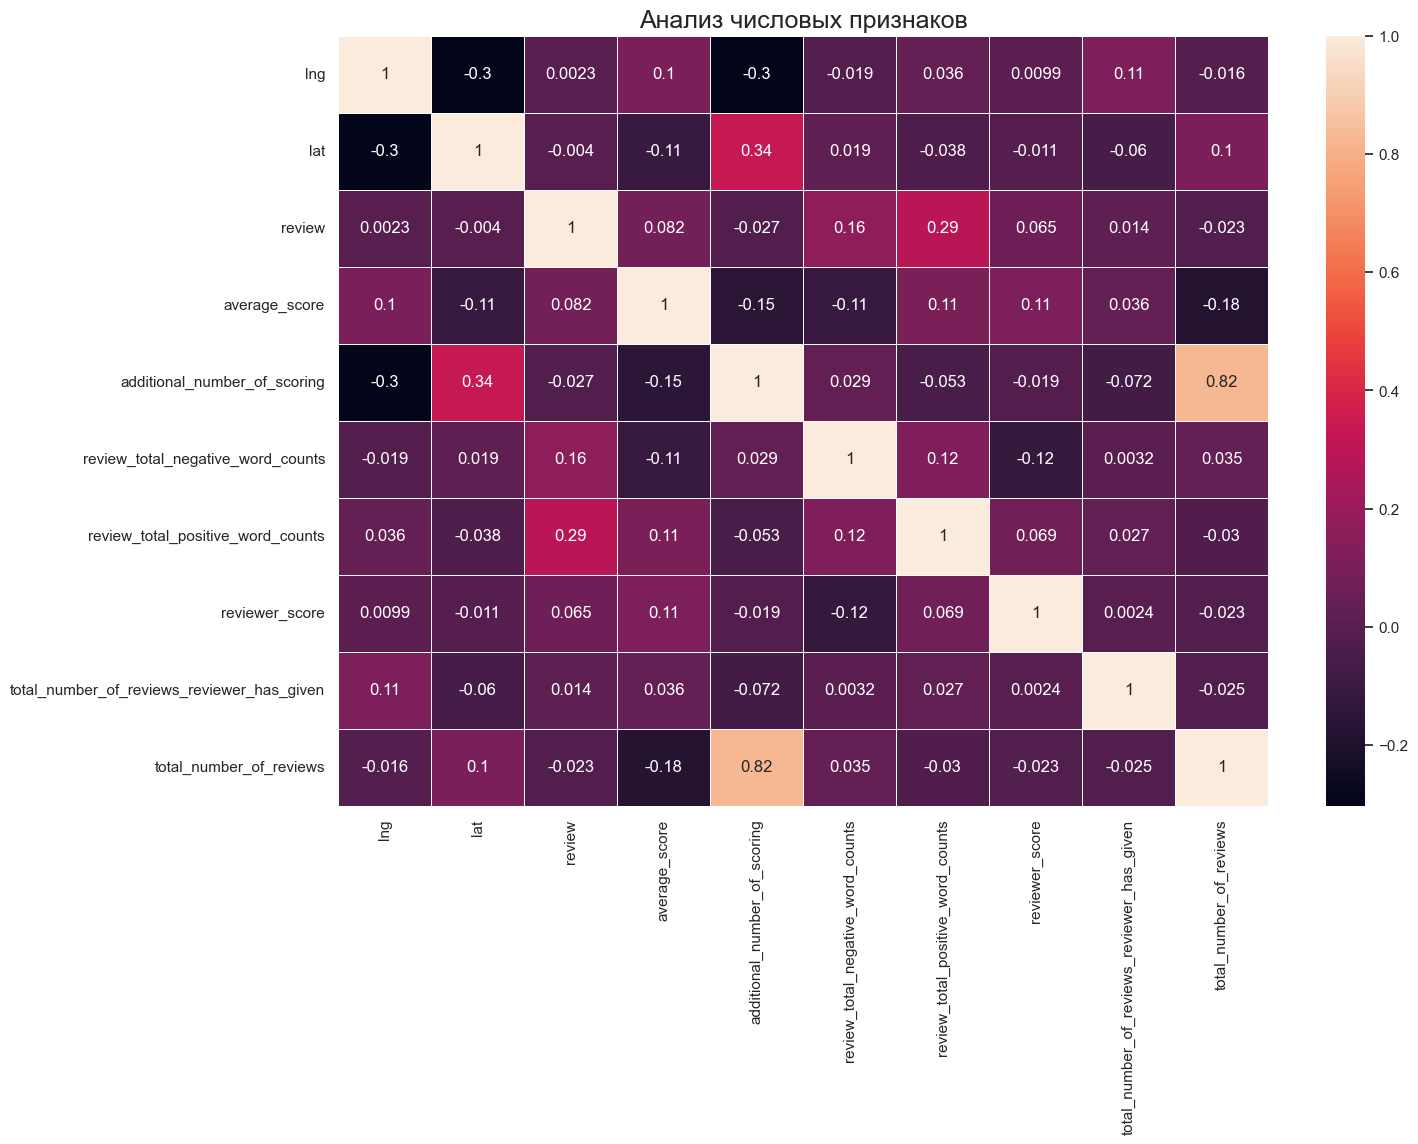

In [51]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data[number].corr(method='pearson'), annot=True,linewidths=.5)
plt.title('Анализ числовых признаков',fontsize=18);

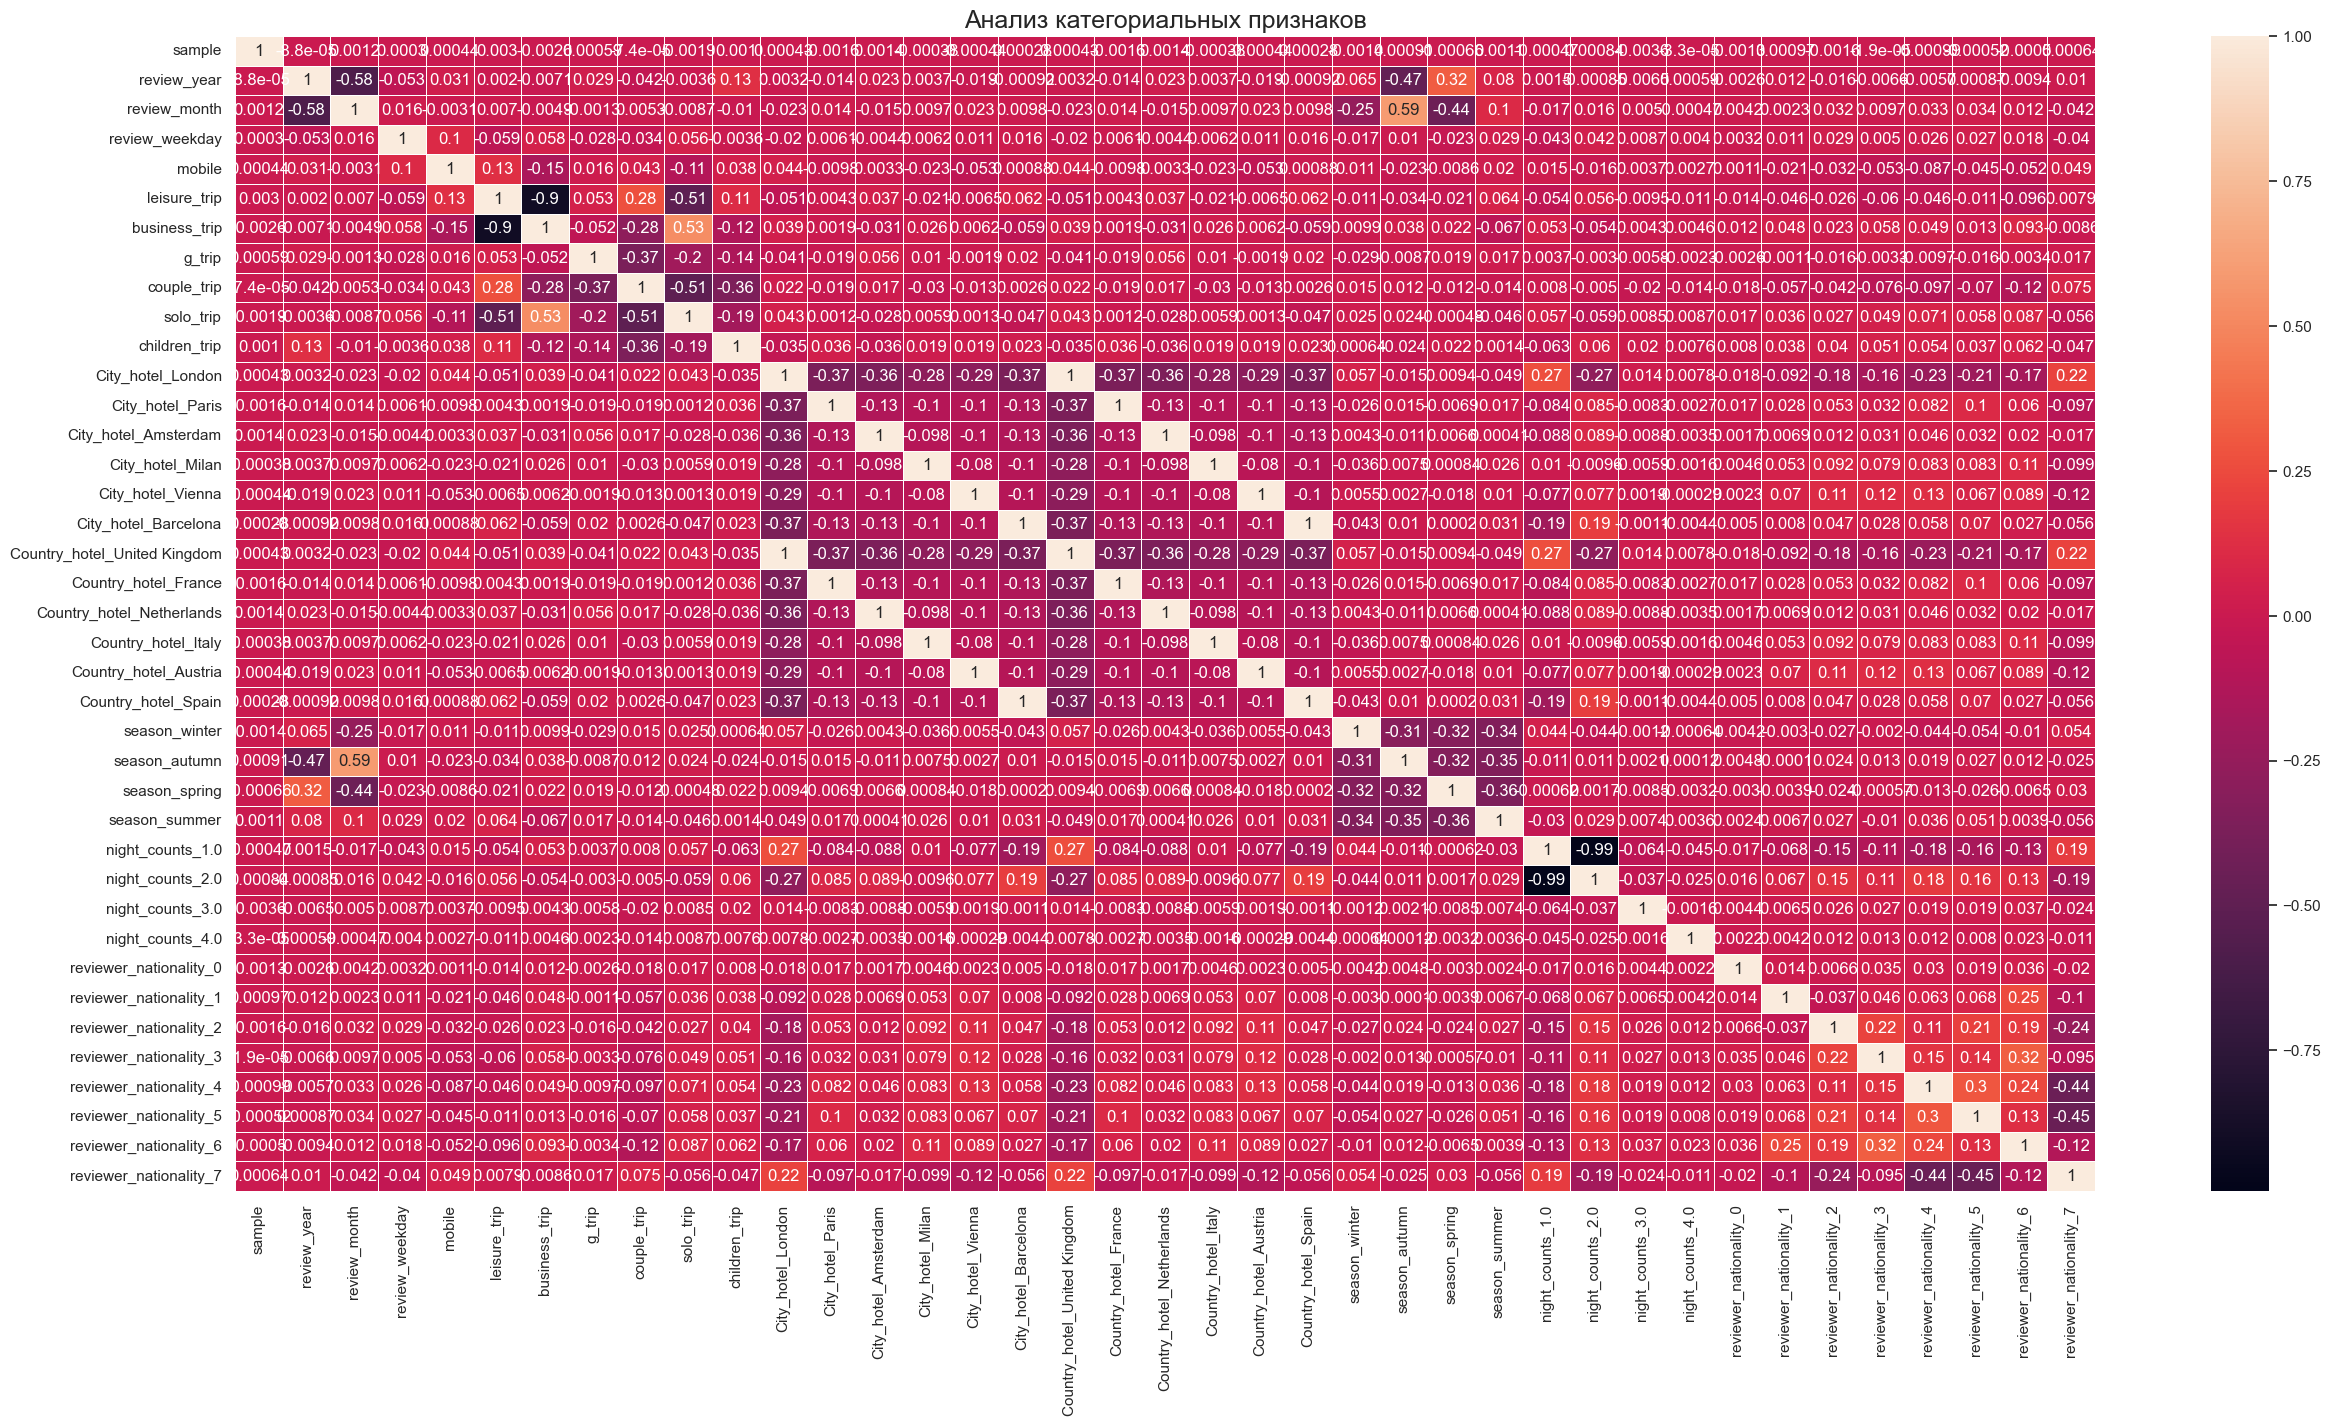

In [52]:
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(data[cat].corr(method='spearman'), annot=True,linewidths=.5)
plt.title('Анализ категориальных признаков',fontsize=18);

Сильной взаимосвязи между признаками от +/-0.95 не обнаружено

# Отбор признаков на основе их важности

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2

number.remove('reviewer_score')

X = data.drop(['reviewer_score'], axis = 1)  
y = data['reviewer_score']
y=y.astype('int')

# Числовые данные
X_number = SelectKBest(f_classif, k=12)
X_train_number = X_number.fit_transform(X[number], y)  
print("Selected features:", X[number].columns[X_number.get_support()]);

e:\Ан2\Аналитик (new)\Проджект питон\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=12 is greater than n_features=9. All the features will be returned.
  warnings.warn(


Selected features: Index(['lng', 'lat', 'review', 'average_score', 'additional_number_of_scoring',
       'review_total_negative_word_counts',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given',
       'total_number_of_reviews'],
      dtype='object')


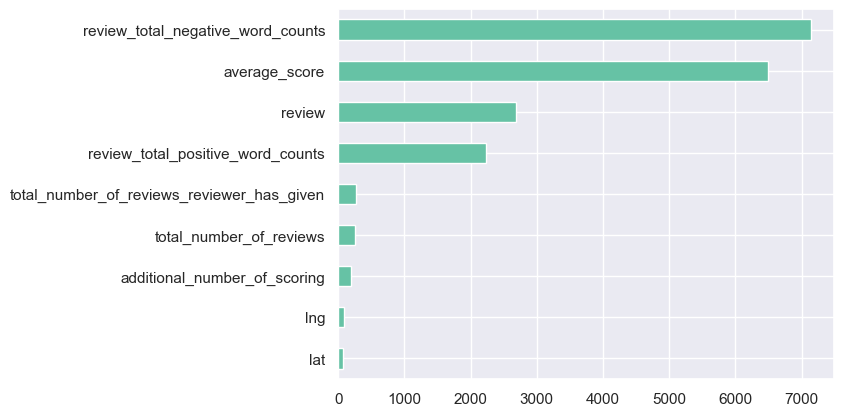

In [54]:
imp_n = pd.Series(f_classif(X[number], y)[0], index=number)
imp_n.sort_values(inplace = True)
imp_n.plot(kind = 'barh');

In [55]:
# Категориальные данные
X_cat = SelectKBest(chi2, k=12)
X_train_cat = X_cat.fit_transform(X[cat], y)  
print("Selected features:", X[cat].columns[X_cat.get_support()]) 

Selected features: Index(['sample', 'review_month', 'mobile', 'leisure_trip', 'business_trip',
       'couple_trip', 'solo_trip', 'City_hotel_London',
       'Country_hotel_United Kingdom', 'reviewer_nationality_2',
       'reviewer_nationality_3', 'reviewer_nationality_6'],
      dtype='object')


<Axes: >

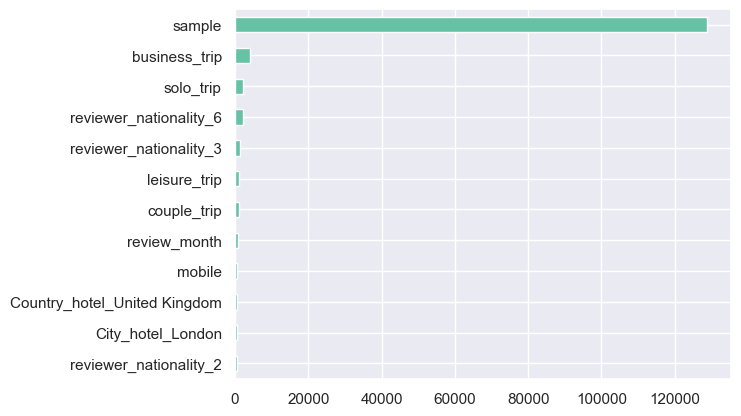

In [56]:
imp_cat = pd.Series(chi2(X[cat], y)[0], index=cat).nlargest(12)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [57]:
imp_cat

reviewer_nationality_2             530.986817
City_hotel_London                  537.949938
Country_hotel_United Kingdom       537.949938
mobile                             625.658011
review_month                       732.241729
couple_trip                       1001.139514
leisure_trip                      1012.659769
reviewer_nationality_3            1289.529374
reviewer_nationality_6            2097.113485
solo_trip                         2244.342170
business_trip                     4195.603623
sample                          128935.000000
dtype: float64

In [58]:
need_col = list(X[cat].columns[X_cat.get_support()]) + list(X[number].columns[X_number.get_support()][0:])
need_col.remove('sample')
X = X[need_col]

In [59]:
# Выбранные признаки
need_col

['review_month',
 'mobile',
 'leisure_trip',
 'business_trip',
 'couple_trip',
 'solo_trip',
 'City_hotel_London',
 'Country_hotel_United Kingdom',
 'reviewer_nationality_2',
 'reviewer_nationality_3',
 'reviewer_nationality_6',
 'lng',
 'lat',
 'review',
 'average_score',
 'additional_number_of_scoring',
 'review_total_negative_word_counts',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'total_number_of_reviews']

### Нормализация данных.

,review_month,mobile,leisure_trip,business_trip,couple_trip,solo_trip,City_hotel_London,Country_hotel_United Kingdom,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_6,lng,lat,review,average_score,additional_number_of_scoring,review_total_negative_word_counts,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,total_number_of_reviews
0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.032813,0.002396,0.352735,0.000000,0.488798,-0.285714,-0.411765,0.571429,-0.057096
1,-1.2,-1.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.028685,0.006368,-0.980181,-0.142857,-0.085540,-0.285714,-0.529412,1.571429,-0.315253
2,0.6,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,0.0,0.0,1.0,0.462582,-0.803884,-0.327020,0.714286,-0.629328,-0.142857,-0.647059,1.571429,-0.704731
3,0.4,-1.0,0.0,0.0,0.0,1.0,-1.0,-1.0,0.0,0.0,0.0,0.476404,-0.790766,-0.122178,-1.285714,-0.625255,-0.428571,0.000000,0.714286,-0.622757
4,-0.8,-1.0,-1.0,1.0,1.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.968430,0.268189,0.370798,0.142857,1.167006,-0.238095,0.529412,1.000000,2.223491


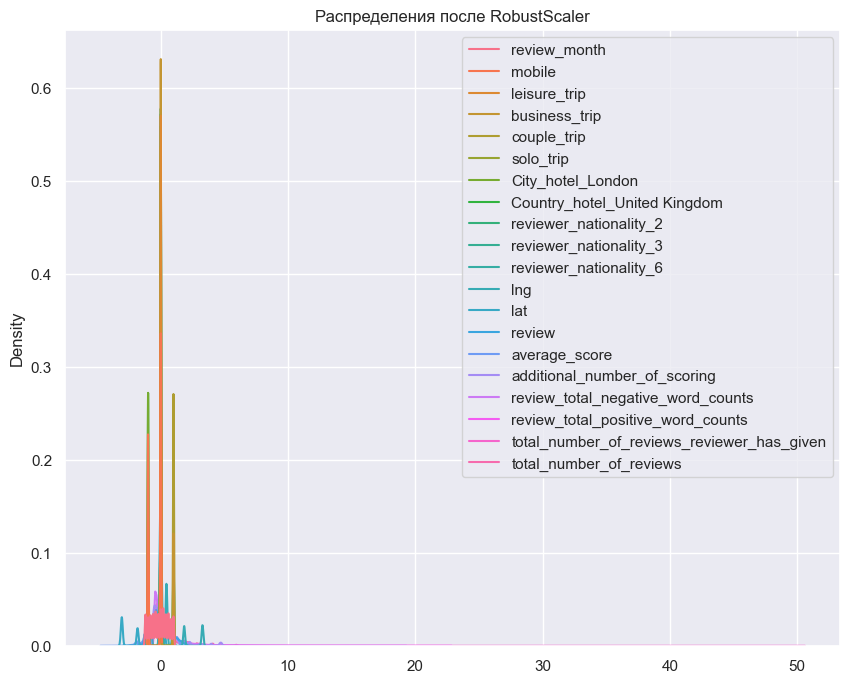

In [60]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(X)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=X.columns)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r, ax=ax1);


df_r.head()

### Обучение данных

In [61]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
y = train_data.reviewer_score.values # наш таргет
# train_data = train_data[need_col]
X = train_data[need_col]

test_data = data.query('sample == 0').drop(['sample'], axis=1)
test_data = test_data[need_col] 

# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [62]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 20), (386803, 48), (386803, 20), (309442, 20), (77361, 20))

In [63]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [64]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.3s finished


In [65]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAE: 0.8946809426245903
MAPE: 0.12773864360336193


<Axes: >

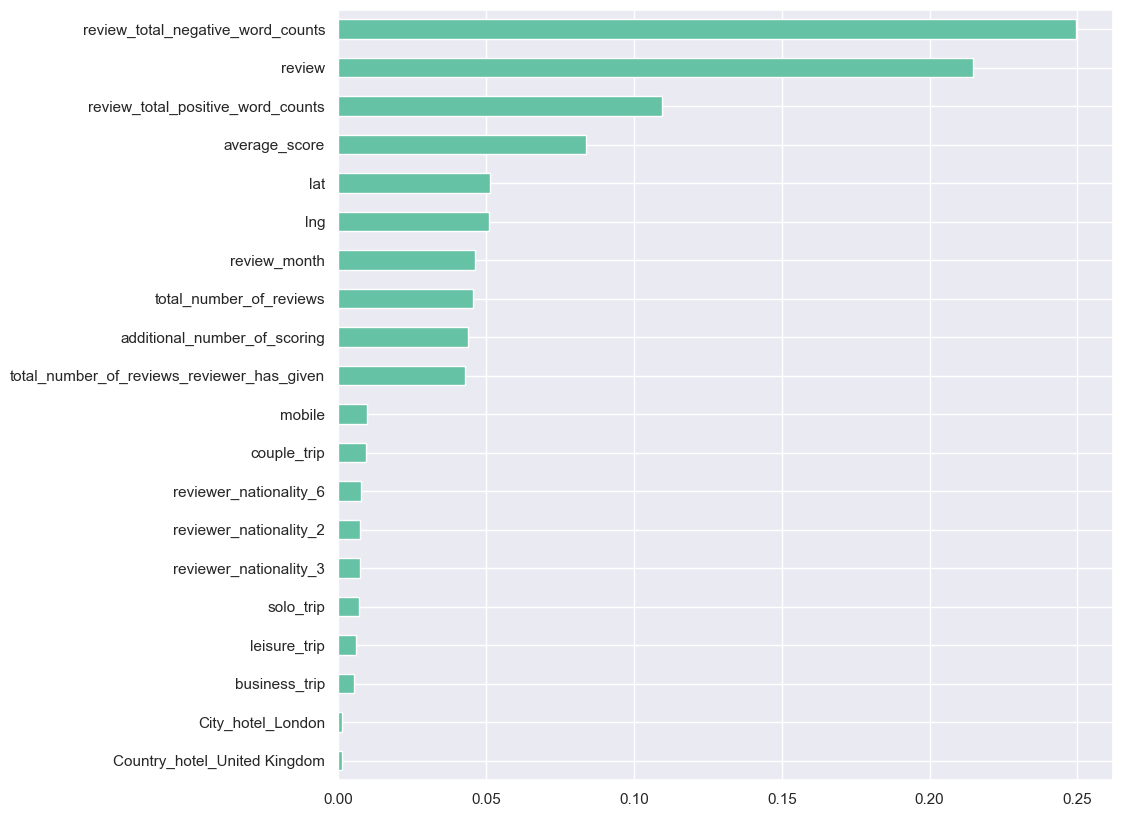

In [66]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nsmallest(20).plot(kind='barh')

In [67]:
test_data.head()

,review_month,mobile,leisure_trip,business_trip,couple_trip,solo_trip,City_hotel_London,Country_hotel_United Kingdom,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_6,lng,lat,review,average_score,additional_number_of_scoring,review_total_negative_word_counts,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,total_number_of_reviews
386803,7,0,1,0,1,0,0,0,0,0,0,9.171102,45.533137,0.9061,8.1,904,52,62,1,16670
386804,12,0,1,0,0,0,0,0,1,1,0,4.834443,52.385649,0.0440,8.6,612,10,0,7,5018
386805,11,1,0,1,0,1,0,0,0,0,1,2.161520,41.393192,0.6908,8.3,46,3,5,15,351
386806,10,0,1,0,1,0,0,0,0,0,0,9.196298,45.479888,0.2057,9.1,241,0,27,9,1543
386807,5,1,0,1,0,1,0,0,0,0,0,4.888644,52.370545,0.0621,9.1,834,0,7,2,4687


In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128935 entries, 386803 to 515737
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   review_month                                128935 non-null  int32  
 1   mobile                                      128935 non-null  int64  
 2   leisure_trip                                128935 non-null  int64  
 3   business_trip                               128935 non-null  int64  
 4   couple_trip                                 128935 non-null  int64  
 5   solo_trip                                   128935 non-null  int64  
 6   City_hotel_London                           128935 non-null  int64  
 7   Country_hotel_United Kingdom                128935 non-null  int64  
 8   reviewer_nationality_2                      128935 non-null  int64  
 9   reviewer_nationality_3                      128935 non-null  int64  
 

In [69]:
# Предсказываем данные
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.2s finished


In [70]:
predict_submission
len(predict_submission)

128935

In [71]:
list(sample_submission)

['reviewer_score', 'id']

In [72]:
sample_submission['reviewer_score'] = predict_submission

In [73]:
sample_submission.to_csv('submission2.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.789,488440
1,7.919,274649
2,8.122,374688
3,9.796,404352
4,9.617,451596
5,9.269,302161
6,8.163,317079
7,7.658,13963
8,8.625,159785
9,8.009,195089


### Общй вывод:
* Можно обобщить, что отзывы имеют наибольшее влияние на оценку отеля, чем длиннее отзыв, тем он возможно достовернее.